## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [21]:
from keras.datasets import fashion_mnist
import keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [22]:
import warnings
warnings.filterwarnings('ignore')

### Find no.of samples are there in training and test datasets

In [23]:
x_train.shape, y_train.shape  #60000 samples of 28*28 images are available

((60000, 28, 28), (60000,))

In [24]:
x_test.shape, y_test.shape  #10000 samples of 28*28 images are available

((10000, 28, 28), (10000,))

### Find dimensions of an image in the dataset

In [25]:
x_train[0].ndim # No of dimension of an image

2

In [26]:
x_train[0].shape  #Dimensions of the image

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [27]:
num_classes = 10  # since this dataset contains only classes, considering it as num_classes
#applying one hot vectors on labels.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Normalize both the train and test image data from 0-255 to 0-1

In [29]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')    # Images are flattended out into a vector of 784 elements
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255

In [30]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [31]:
x_train.shape #reshaped in above cells before normalizing. 

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [33]:
model1 = Sequential()
# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))
# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [34]:
model1.add(MaxPooling2D(pool_size=(2,2)))
# Dropout
model1.add(Dropout(0.25))
# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))
# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [35]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

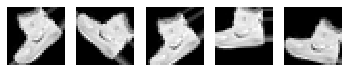

In [36]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [37]:
Modelhist = model1.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.9516 - accuracy: 0.6471 - val_loss: 0.6427 - val_accuracy: 0.7576
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.7109 - accuracy: 0.7346 - val_loss: 0.6942 - val_accuracy: 0.7425
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.6471 - accuracy: 0.7564 - val_loss: 0.6979 - val_accuracy: 0.7479
Epoch 4/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.6076 - accuracy: 0.7715 - val_loss: 0.5822 - val_accuracy: 0.7752
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.5779 - accuracy: 0.7838 - val_loss: 0.5056 - val_accuracy: 0.8190
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.5586 - accuracy: 0.7890 - val_loss: 0.5037 - val_accuracy: 0.8129
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.5388 - accuracy: 0.7990 - val_loss: 0.4827 -

In [38]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

###  Report the final train and validation accuracy

In [39]:
loss_and_metrics = model1.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 9s 144us/step
[0.4315207036137581, 0.8365833163261414]


In [40]:
loss,accuracy  = model1.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)


model accuracy : 0.8353000283241272


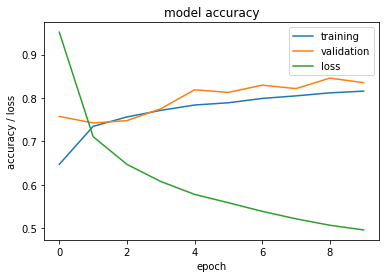

In [43]:
#print("validation accuracy : ", val_accuracy)

plt.plot(Modelhist.history['accuracy'])
plt.plot(Modelhist.history['val_accuracy'])
plt.plot(Modelhist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='best')
plt.show()

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [44]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [45]:
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

In [46]:
xTrain.shape,yTrain.shape

((50000, 32, 32, 3), (50000, 1))

In [47]:
xTest.shape, yTest.shape

((10000, 32, 32, 3), (10000, 1))

In [48]:
xTrain

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [49]:
xTrain = xTrain.astype('float32')      # Change the data type to float from integer (0 - 255)
xTest = xTest.astype('float32')
xTrain /= 255                           # Scale the data between 0 and 1
xTest /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [50]:
def data_gen(fc,sc,fsn,ssn,Zw,Rot,wtshift,htshift,hflip,vflip):  #Created data_gen function 
    datagen1 = ImageDataGenerator(
    featurewise_center=fc,  # set input mean to 0 over the dataset
    samplewise_center=sc,  # set each sample mean to 0
    featurewise_std_normalization=fsn,  # divide inputs by std of the dataset
    samplewise_std_normalization=ssn,  # divide each input by its std
    zca_whitening=Zw,  # apply ZCA whitening
    rotation_range=Rot,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=wtshift,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=htshift,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=hflip,  # randomly flip images
    vertical_flip=vflip   
    )  
    return datagen1


In [51]:
datagen1 = data_gen(True,True,False,False,True,90,0.50,0.50,True,False)

### **Prepare/fit the generator.**

In [52]:
datagen1.fit(xTrain)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


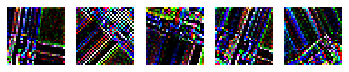

In [53]:
#Tried checking the images for multiple images
gen = datagen1.flow(xTrain[1:2], batch_size=1)  
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


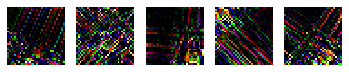

In [55]:
gen = datagen1.flow(xTrain[3:4], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())  #without cmap
    plt.plot()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


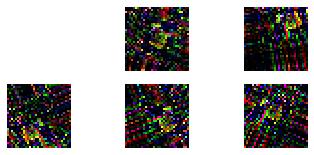

In [56]:
gen = datagen1.flow(xTrain[3:4], batch_size=1)
for i in range(1, 6):
    plt.subplot(330+1+i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(),cmap='gray')  #without cmap
    plt.plot()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


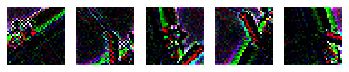

In [57]:
gen = datagen1.flow(xTrain[2:3], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(),cmap='gray')  #without cmap
    plt.plot()
plt.show()